Importing Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

Data Collection

In [25]:
Medical_data=pd.read_csv('insurance.csv')
Medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Preparation

In [26]:
Medical_data.shape

(1338, 7)

In [27]:
Medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
Medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [29]:
Medical_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [30]:
Medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
Medical_data['charges'].value_counts()

charges
1639.56310     2
6203.90175     1
12981.34570    1
28101.33305    1
28923.13692    1
              ..
1163.46270     1
19496.71917    1
7201.70085     1
5425.02335     1
16115.30450    1
Name: count, Length: 1337, dtype: int64

In [32]:
Medical_data.replace({
    'sex':{'male':0,'female':1},
    'smoker':{'no':0,'yes':1},
    'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}
},inplace=True)

<Axes: >

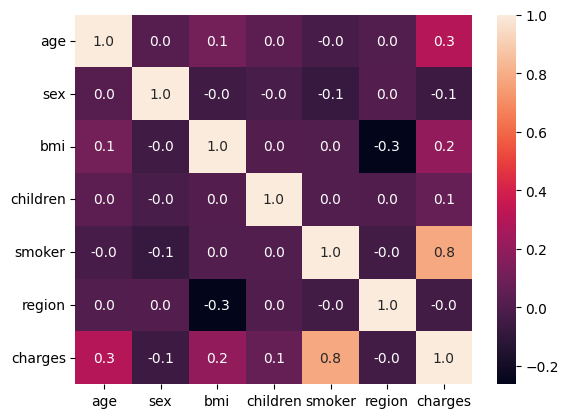

In [35]:
corr=Medical_data.corr()
sns.heatmap(data=corr,annot=True,fmt='.1f')

<Axes: xlabel='age', ylabel='Density'>

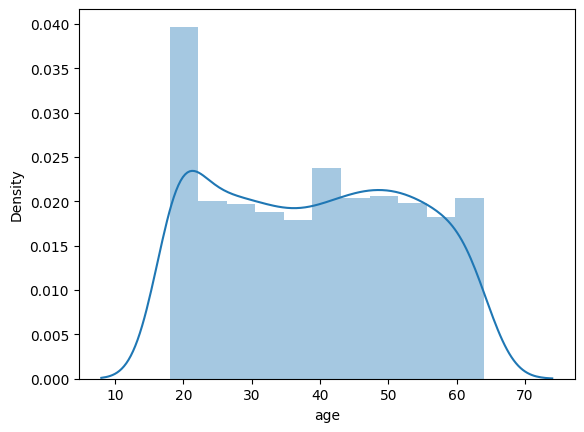

In [38]:
sns.distplot(Medical_data['age'])

<Axes: xlabel='bmi', ylabel='Density'>

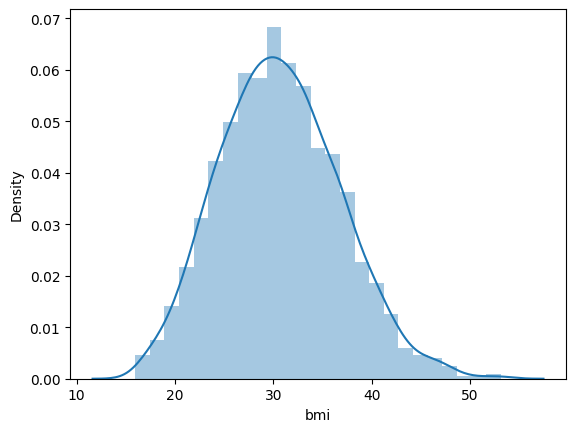

In [40]:
sns.distplot(Medical_data['bmi'])

<Axes: xlabel='smoker', ylabel='Density'>

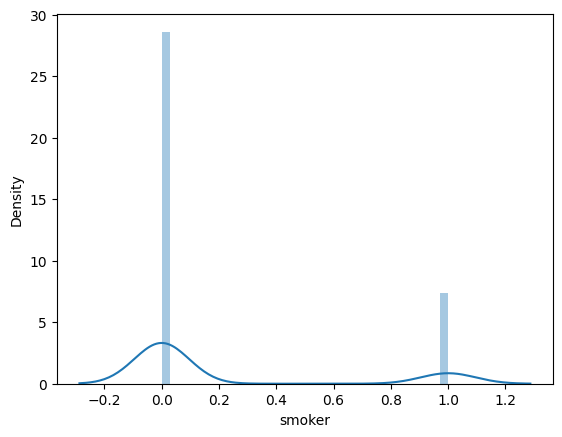

In [42]:
sns.distplot(Medical_data['smoker'])

Train Test Split

In [43]:
X=Medical_data.drop('charges',axis=1)
Y=Medical_data['charges']

print(X.shape)
print(Y.shape)

(1338, 6)
(1338,)


In [45]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1070, 6)
(1070,)
(268, 6)
(268,)


Model Building

In [46]:
Model=LinearRegression()
Model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
y_train_pred=Model.predict(x_train)
means=mean_absolute_error(y_train,y_train_pred)
r2=r2_score(y_train,y_train_pred)

print(means)
print(r2)

4210.3574725027665
0.7415700001111735


In [49]:
y_pred=Model.predict(x_test)
means=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(means)
print(r2)

4174.047876486471
0.7839279776463969
